#  <font color='purple'>Projet 10: Détectez des faux billets avec R ou Python

# Table of Contents

* **[Mise en place du jeu de données](#chapter1)**
    * [Importation des librairies](#section_1_1)
    * [Chargement et  préparation des données](#section_1_2)
    * [Analyse des distributions des variables](#section_1_3)
    * [Analyse des corrélations entre les variables](#section_1_4)
* **[Traitement des valeurs manquantes par regression linéaire](#chapter2)**
    * [Régression linéaire multiple](#section_2_1)
    * [Analyse des résultats](#section_2_2)
    * [Calcul des leviers](#section_2_3)
    * [Calcul des résidus studentisés](#section_2_4)
    * [Détermination de la distance de cook ](#section_2_5)
    * [Test d'homoscédasticité ](#section_2_6)
    * [Test d'homoscédasticité](#section_2_7)
    * [Test de la normalité des résidus](#section_2_8)
    * [Imputation des valeurs manquantes par régression linéaire](#section_2_9)
* **[Analyse en Composante Principale(ACP)](#chapter3)**
    * [Eboulis des valeurs propres](#section_3_1)
    * [Analyse des composantes principales](#section_3_2)
    * [Cercle des corrélations](#section_3_3)
    * [Projection des individus](#section_3_4)
* **[Régression Logistique](#chapter4)** 
    * [Matrice de confusion](#section_4_1)
    * [Rapport de classification](#section_4_2)
    * [Courbe de ROC ](#section_4_3)
* **[K-Means](#chapter5)**     
    * [Projection des individus et centroïdes sur le premier plan factoriel](#section_5_1)
    * [Matrice de confusion](#section_5_2)
    * [Rapport de classification](#section_5_3)
    * [Choix du modèle de prédiction](#section_5_4)
* **[Construction de l'algorithme de prédiction de la régression logistique](#chapter6)**   

# <font color='blue'>Mise en place du jeu de données <a class="anchor" id="chapter1"></a>

## <font color='purple'>Importation des librairies <a class="anchor" id="section_1_1"></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from scipy.stats import t, shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import statsmodels
import warnings
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from scipy.stats import mode
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
warnings.simplefilter(action='ignore', category=FutureWarning)

In [94]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## <font color='purple'>Chargement et préparation des données <a class="anchor" id="section_1_2"></a>

In [95]:
# Chargement du dataframe billets
billets = pd.read_csv('billets.csv', sep=';')

In [96]:
# Affichage les 5 premières lignes du dataframe
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [97]:
# Affichage les dimensions du dataset
print("Le dataframe billets comporte {} observations ".format(billets.shape[0]))
print("Le dataframe billets comporte {} colonnes".format(billets.shape[1]))

Le dataframe billets comporte 1500 observations 
Le dataframe billets comporte 7 colonnes


In [98]:
# Observation des données
print(billets.shape)
print('')
billets.info()

(1500, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [99]:
# Vérification des valeurs que prend la colonne is_genuine
billets['is_genuine'].unique()

array([ True, False])

In [100]:
# Détermination du nombre de vrai et faux billets
print("Le nombre de vrai billets est de :",billets.loc[billets["is_genuine"]==True]["is_genuine"].count())
print("Le nombre de faux billets est de :",billets.loc[billets["is_genuine"]==False]["is_genuine"].count())

Le nombre de vrai billets est de : 1000
Le nombre de faux billets est de : 500


In [101]:
# Principales statistiques du dataframe
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [102]:
# Vérification des doublons
billets.duplicated().sum()

0

Le dataframe ne contient aucun doublons.

In [103]:
# Vérification des valeurs manquantes
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Le dataframe contient 37 valeurs manquantes sur 'margin_low'.

## <font color='purple'>Analyse des distributions des variables <a class="anchor" id="section_1_3"></a>

<Figure size 100x100 with 0 Axes>

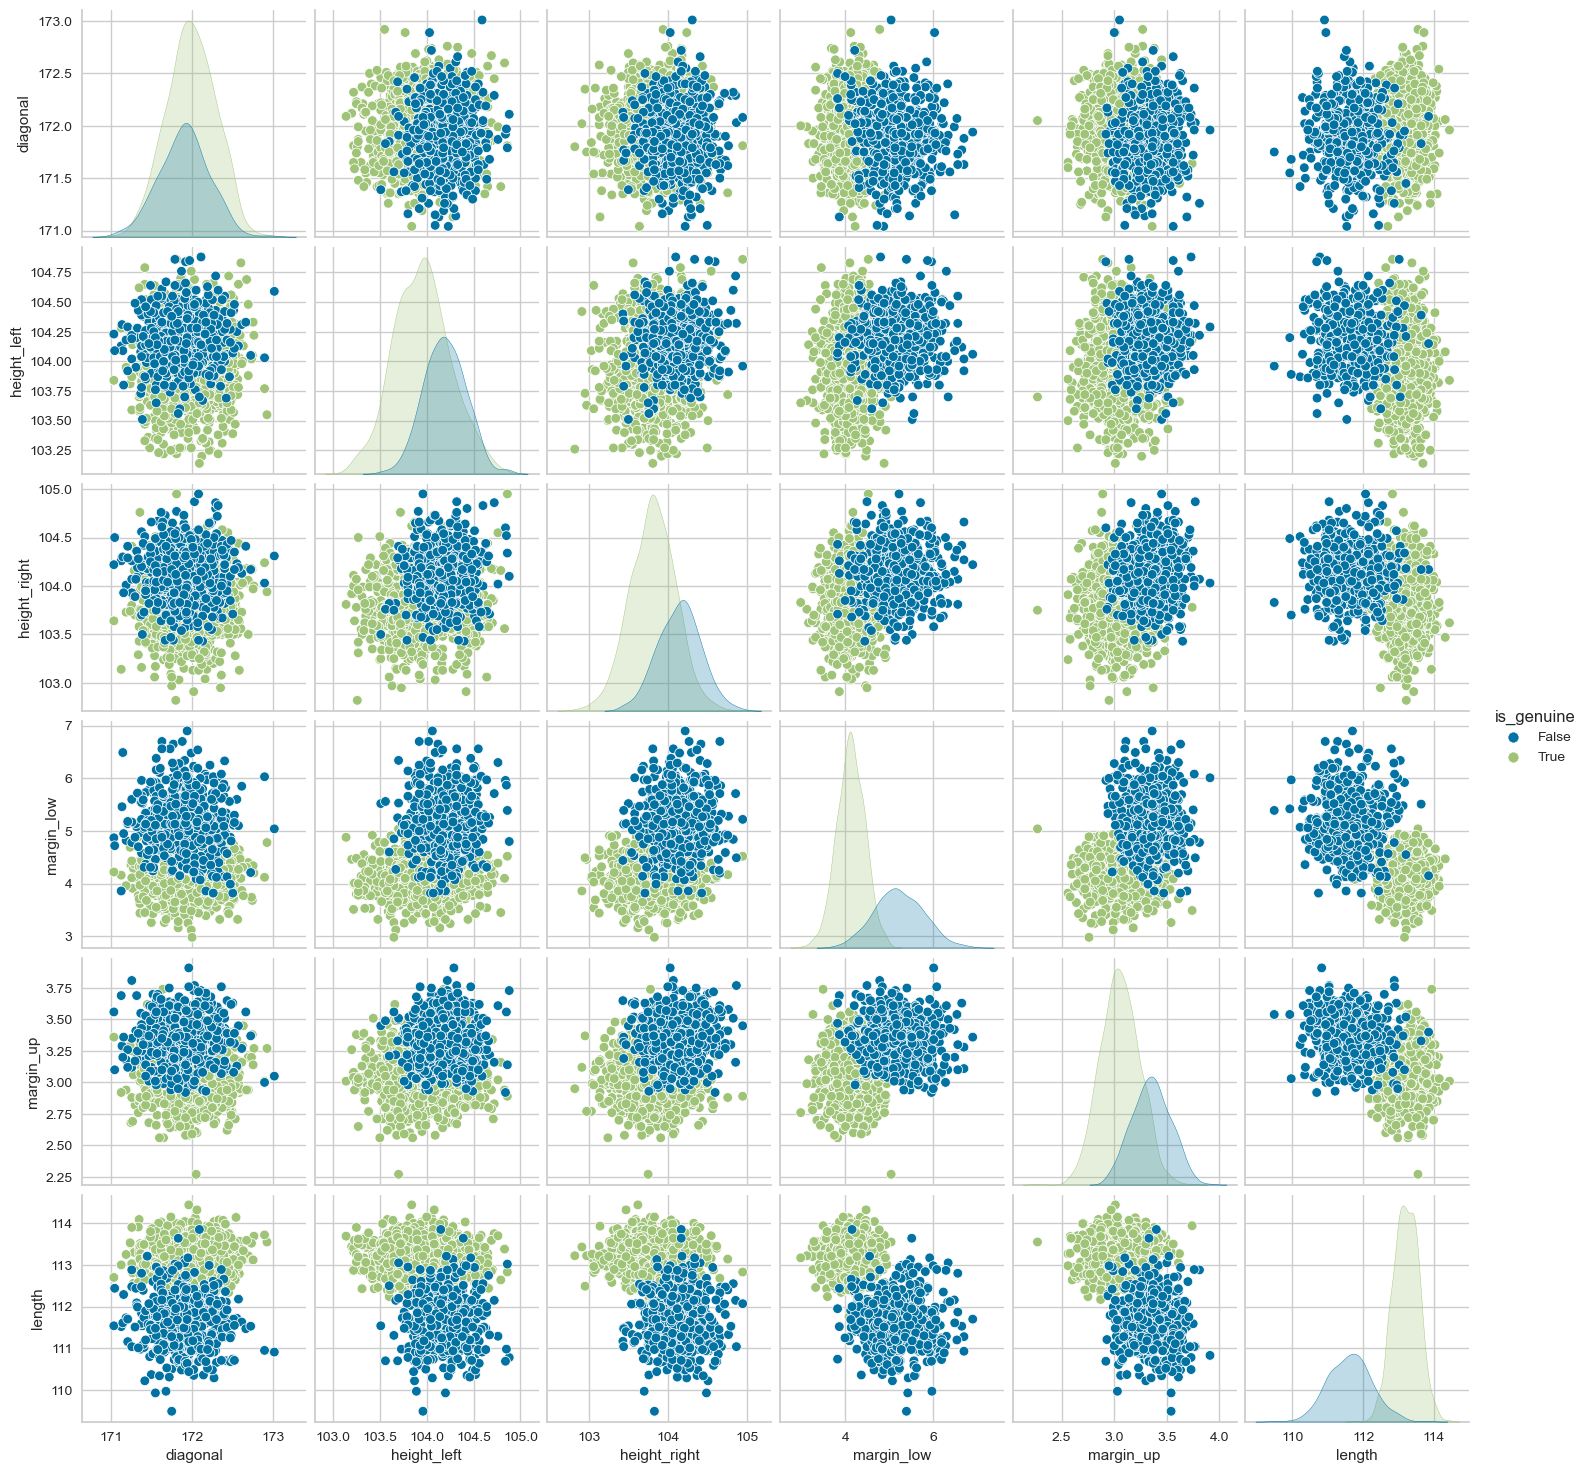

In [104]:
# Répartition des variables
plt.figure(figsize=(1, 1))
sns.pairplot(billets,kind="scatter",hue='is_genuine')

Les variables 'margin_low' et 'length' affichent des pics distincts pour les vrais et faux billets, mettant en évidence des différences notables dans leurs distributions respectives.

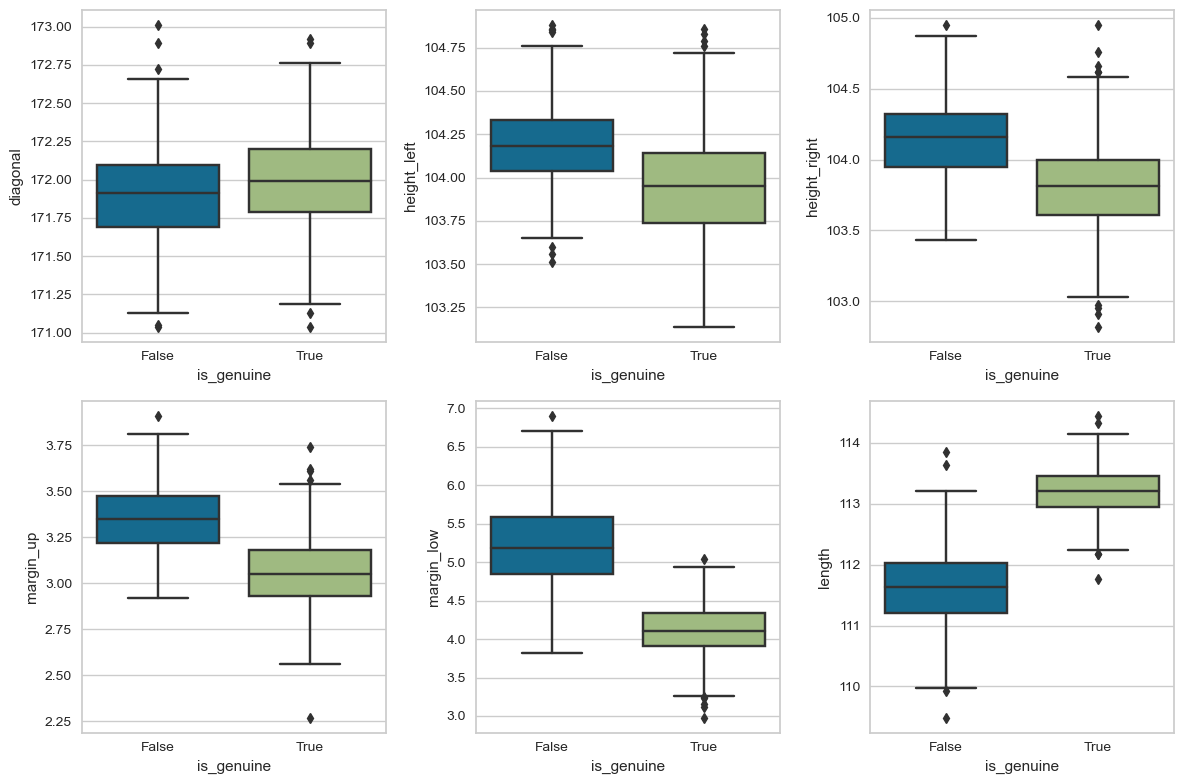

In [105]:
# Distribution des vrais et faux billets par variables.

# Liste des variables numériques
variables_numeriques = ['diagonal', 'height_left','height_right','margin_up','margin_low','length'] 

# Création d'un boxplot pour chaque variable numérique
plt.figure(figsize=(12, 8)) 
for i, var in enumerate(variables_numeriques, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(x='is_genuine', y=var, data=billets)

plt.tight_layout()
plt.show()

Effectivement, on observe que les différences dans la distribution des vrais et faux billets sont plus accentuées pour les variables 'margin_low' et 'length'.

## <font color='purple'>Analyse des corrélations entre les variables <a class="anchor" id="section_1_4"></a>

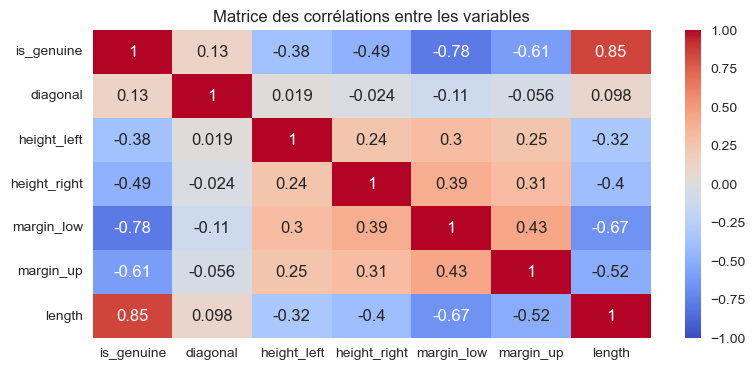

In [106]:
# Analyse des corrélations entre les variables

# Affichage de la matrice de corrélation entre les variables
plt.figure(figsize=(9,4))
sns.heatmap(billets.corr(),cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Matrice des corrélations entre les variables')

plt.show()

Il est constaté que la variable 'is_genuine' présente une forte corrélation positive avec 'length' et une forte corrélation  négative avec 'margin_low'.

# <font color='blue'>Traitement des valeurs manquantes par regression linéaire <a class="anchor" id="chapter2"></a>

## <font color='purple'>Régression linéaire multiple <a class="anchor" id="section_2_1"></a>

In [107]:
# Séparation des données en ensembles avec et sans valeurs manquantes dans 'margin_low'

# Dataframe sans valeurs manquantes
billets_sansNan = billets[billets['margin_low'].notna()]
# Dataframe avec valeurs manquantes
billets_Nan = billets[billets['margin_low'].isna()]

In [108]:
# Détermination des valeurs prédictives les plus pertinentes (significatives):régression linéaire multiple
reg_multi1 = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_sansNan).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          4.75e-299
Time:                        18:01:22   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le seuil fixé pour notre test.\
Le coefficient de détermination R^2​ qui mesure les variations de la variable cible qui sont expliquées par le modèle,vaut 0.617 et le R^2 ajusté 0.615.\
Nous allons retirer les variables non significatives.

In [109]:
# Regression linéaire multiple avec les variables significatives
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_sansNan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          1.24e-304
Time:                        18:01:22   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Il est maintenant évident que tous les paramètres du modèle sont statistiquement significatifs. Avec un coefficient de détermination R^2 de 0.617, proche de la valeur du R^2 ajusté.\
Cela indique que le modèle est bien ajusté et convient à des fins de prédiction.

## <font color='purple'>Analyse des résultats <a class="anchor" id="section_2_2"></a>

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé df_analyses.

In [110]:
# Nos tests seront réalisés avec un niveau 𝛼=5 % 
alpha = 0.05

In [111]:
# Récupération du nombre d'individus de l'échantillon(n) et le nombre de variables(p)
n = billets_sansNan.shape[0]
p = 3

In [112]:
# Création d'un dataframe avec une colonne pour les observations(obs)
df_analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

In [113]:
df_analyses

,obs
0,1
1,2
2,3
3,4
4,5
...,...
1458,1459
1459,1460
1460,1461
1461,1462


## <font color='purple'>Calcul des leviers <a class="anchor" id="section_2_3"></a>

Nous allons calculer les leviers en sachant que le seuil des leviers est de  **2∗𝑝/𝑛**

In [114]:
# Ajout de la colonne levier dans le dataframe
df_analyses['levier'] = reg_multi.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

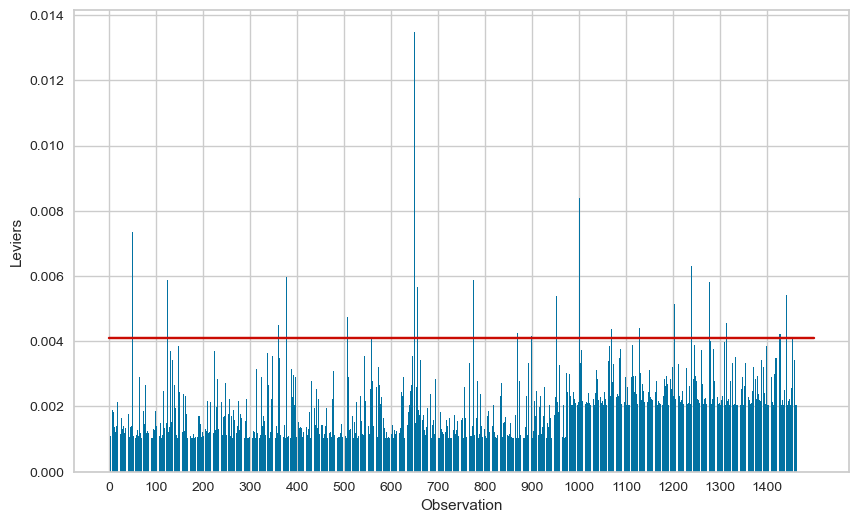

In [115]:
# Réprésentation graphique des leviers
plt.figure(figsize=(10,6))
plt.bar(df_analyses['obs'], df_analyses['levier'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

In [116]:
# Sélection des points pour lesquels le levier est supérieur au seuil
df_analyses.loc[df_analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
48,49,0.007353
52,53,0.010647
54,55,0.004408
123,124,0.005865
...,...,...
1441,1442,0.005428
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796


## <font color='purple'>Calcul des résidus studentisés <a class="anchor" id="section_2_4"></a>

* Nous allons calculer les résidus studentisés sachant que le seuil pour les résidus studentisés est une loi de Student à **n-p-1 degré de liberté**.

In [117]:
# Calcul des résidus studentisés
df_analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

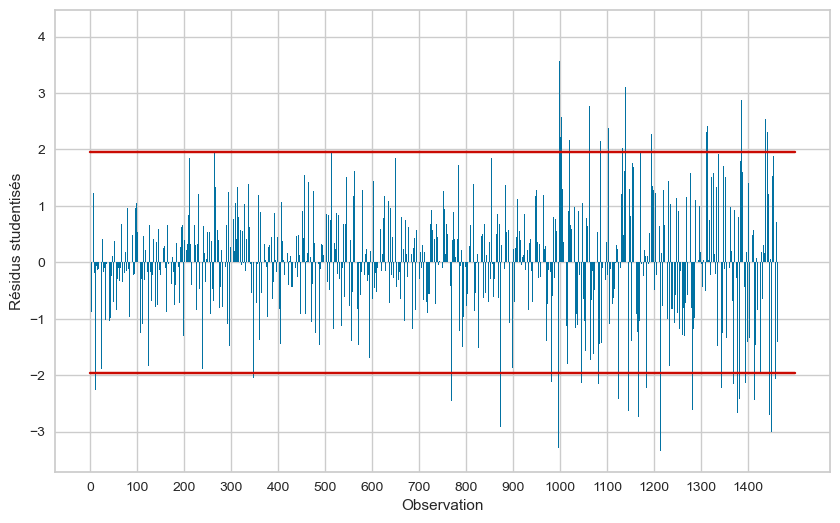

In [118]:
# Affichage graphique
plt.figure(figsize=(10,6))
plt.bar(df_analyses['obs'], df_analyses['rstudent'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## <font color='purple'>Détermination de la distance de cook <a class="anchor" id="section_2_5"></a>

* Nous allons déterminer la distance de cook sachant que le seuil de la distance de Cook est de **n-p**.

In [119]:
influence = reg_multi.get_influence().summary_frame()

In [120]:
df_analyses['dcook'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

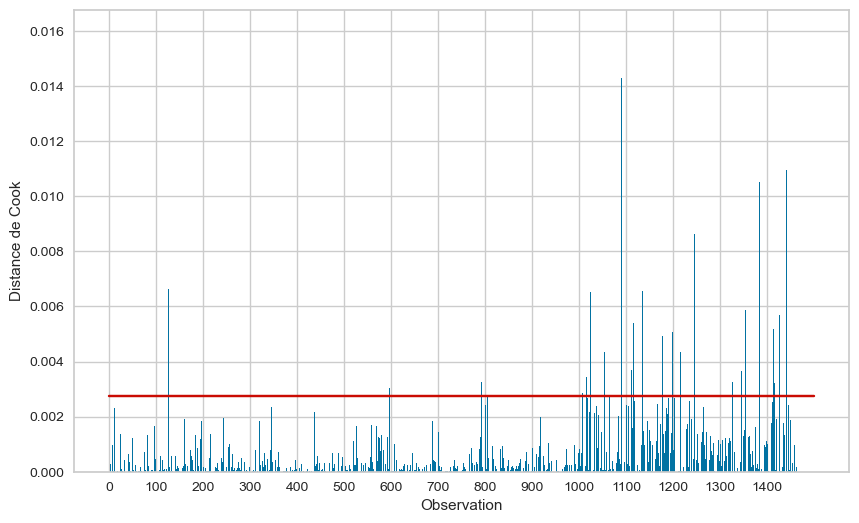

In [121]:
# Détection des observations influentes
plt.figure(figsize=(10,6))
plt.bar(df_analyses['obs'], df_analyses['dcook'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Distance de Cook')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

## <font color='purple'>Vérification de la colinéarité des variables <a class="anchor" id="section_2_6"></a>

La colinéarité fait référence à une relation linéaire entre deux variables explicatives (indépendantes) dans un modèle de régression.

In [122]:
# Colinéarité des variables
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

Ici, toutes nos valeurs de Facteur d'Influence de la Variance(VIF) sont inférieures à 10, il n'y a donc pas de problème de colinéarité dans le modèle de regression.

## <font color='purple'>Test d'homoscédasticité <a class="anchor" id="section_2_7"></a>

**Homoscédasticité**:  Cela se réfère à la constance de la variance des erreurs résiduelles à travers tous les niveaux de la variable prédite, indiquant que la variance des erreurs ne change pas en fonction de la valeur prédite.

Hypothèse nulle(H0) et hypothèse alternative(H1):
* H0: Les variances des erreurs sont constantes (**Homoscédasticité**).
* H1 : Les variances des erreurs ne sont pas constantes(**Hétéroscédasticité**). 

In [123]:
# Test de Breusch-Pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p-value test Breusch Pagan:', pval)
if pval > 0.05:
    print("Les variances des erreurs sont constantes (hypothèse d'homoscédasticité validée)") 
else:
    print("Les variances des erreurs ne sont pas constantes (hypothèse d'homoscédasticité rejetée)")
 
   

p-value test Breusch Pagan: 3.2033559115838186e-36
Les variances des erreurs ne sont pas constantes (hypothèse d'homoscédasticité rejetée)


Selon le résultat du test de Breusch-Pagan, la p-value est inférieure à 5%. Par conséquent, nous rejetons l'hypothèse d'homoscédasticité, ce qui suggère que la variance des erreurs n'est pas constante en fonction de la valeur prédite.

## <font color='purple'>Test de la normalité des résidus <a class="anchor" id="section_2_8"></a>

**Normalité** : Il est important que les erreurs résiduelles soient normalement distribuées, ce qui implique que les résidus doivent suivre une distribution normale avec une moyenne centrée autour de zéro.


Hypothèse nulle(H0) et hypothèse alternative(H1):
* H0: Les résidus suivent une distribution normale.
* H1 : Les résidus ne suivent pas une distribution normale. 

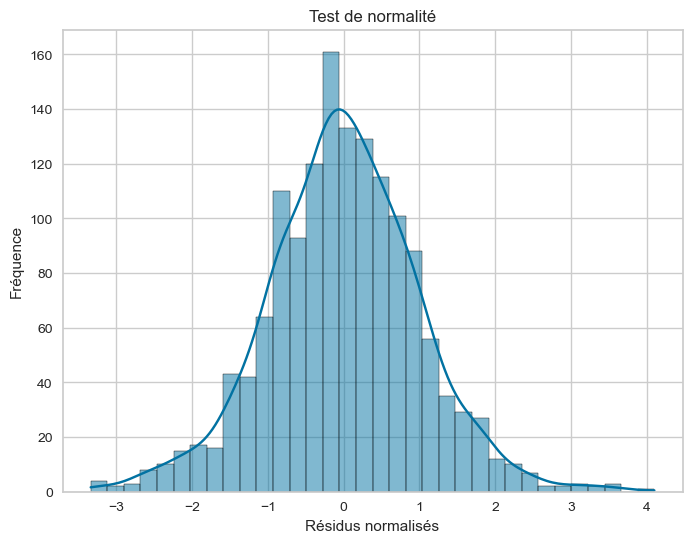

In [124]:
# Test de normalité 
resid_norm = reg_multi.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')    
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()                                  

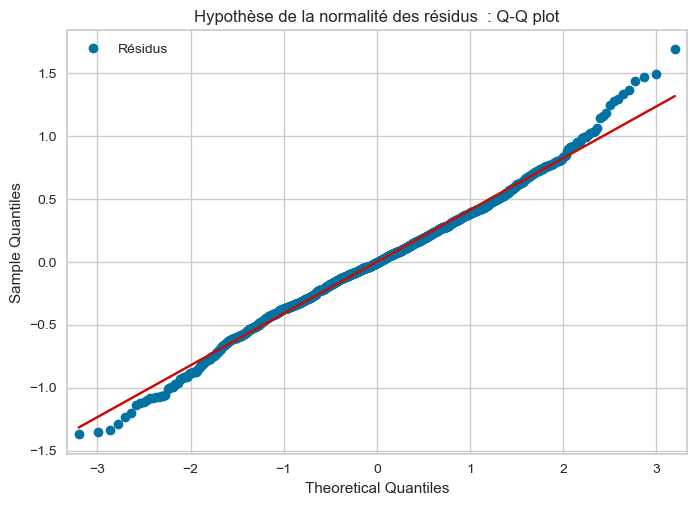

In [125]:
# Réalisation d'un QQ-plot
residuals = reg_multi.resid
sm.qqplot(residuals, line='s', label="Résidus")
plt.title("Hypothèse de la normalité des résidus  : Q-Q plot")
plt.legend()
plt.show()

On observe que certains points s'écartent de la ligne de référence, ce qui indique que la distribution des résidus ne suit pas parfaitement une distribution normale.

In [126]:
# Test de Shapiro-Wilk
statistic, p_value = stats.shapiro(residuals)
if p_value > 0.05:
    print("Les résidus suivent une distribution normale (hypothèse de normalité validée).")
    print("P-value :",p_value)
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse de normalité rejetée).")
    print("p-value :",p_value)
    print("statistic:",statistic)

Les résidus ne suivent pas une distribution normale (hypothèse de normalité rejetée).
p-value : 6.20942773821298e-06
statistic: 0.9936248064041138


Ici, l'hypothèse de normalité est remise en cause (p-value < 0.05).

Bien que la p-valeur soit inférieure à 0,05, remettant ainsi en question l'hypothèse de normalité des résidus, l'observation des résidus révèle une distribution relativement symétrique. De plus, la taille de l'échantillon, dépassant 30 observations, est suffisante pour renforcer la validité des résultats obtenus par la régression linéaire(les résultats de la régression linéaire obtenu ne sont pas ne sont pas absurdes même si le résidu n'est pas pas considéré comme gaussien) . Par conséquent, malgré l'écart par rapport à une distribution gaussienne des résidus, l'application du modèle linéaire gaussien dans ce contexte reste pertinente.

## <font color='purple'>Imputation des valeurs manquantes par régression linéaire <a class="anchor" id="section_2_9"></a>

In [127]:
# Sélection des variables prédictives et de la variable cible 
X = billets_Nan.drop(['diagonal','height_left','height_right','margin_low','length'], axis=1)

y = billets_Nan['margin_low']

In [128]:
# Réalisation des prédictions à l'aide du modèle créé
prediction = reg_multi.predict(sm.add_constant(X))

# Assignation des valeurs prédites à notre dataframe contenant des valeurs manquantes 
df_predict = billets_Nan.assign(margin_low=prediction)
df_predict

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.074248,3.25,112.79
99,True,171.93,104.07,104.18,4.097561,3.14,113.08
151,True,172.07,103.80,104.38,4.122994,3.02,112.93
197,True,171.45,103.66,103.80,3.995830,3.62,113.27
241,True,171.83,104.14,104.06,4.122994,3.02,112.36
251,True,171.80,103.26,102.82,4.137830,2.95,113.22
284,True,171.92,103.83,103.76,4.078487,3.23,113.29
334,True,171.85,103.70,103.96,4.127233,3.00,113.36
410,True,172.56,103.72,103.51,4.101800,3.12,112.95
413,True,172.30,103.66,103.50,4.093322,3.16,112.95


In [129]:
# Imputation des valeurs manquantes du dataframe initial par les valeurs prédites 
billet = billets_sansNan.append(df_predict)
billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.520000,2.89,112.83
1,True,171.46,103.36,103.66,3.770000,2.99,113.09
2,True,172.69,104.48,103.50,4.400000,2.94,113.16
3,True,171.36,103.91,103.94,3.620000,3.01,113.51
4,True,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.305269,2.93,111.21
1315,False,172.08,104.15,104.17,5.205657,3.40,112.29
1347,False,171.72,104.46,104.12,5.161149,3.61,110.31
1435,False,172.66,104.33,104.41,5.171746,3.56,111.47


In [130]:
# Affichage du DataFrame avant le reclassement des index
billet = billet.sort_index()
billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [131]:
# Vérification des valeurs manquantes
billet.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Le dataframe ne contient plus de valeurs manqauntes.

In [132]:
# Vérification des statistiques des dataframes avec et sans sans valeurs manquantes
print("Dataframe avec valeurs manquantes(sans prédiction du model de Régression Linéaire)")
display(billets[["margin_low"]].describe())
print("Dataframe sans valeurs manquantes(avec la prédiction du model de Régression Linéaire)")
display(billet[["margin_low"]].describe())


Dataframe avec valeurs manquantes(sans prédiction du model de Régression Linéaire)


,margin_low
count,1463.000000
mean,4.485967
std,0.663813
min,2.980000
25%,4.015000
50%,4.310000
75%,4.870000
max,6.900000


Dataframe sans valeurs manquantes(avec la prédiction du model de Régression Linéaire)


,margin_low
count,1500.000000
mean,4.482863
std,0.659849
min,2.980000
25%,4.027500
50%,4.310000
75%,4.870000
max,6.900000


Il apparait que les statistiques demeurent stables suite à notre procédure de remplacement des valeurs manquantes de 'margin_low' par le biais d'une régression linéaire.

In [133]:
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# <font color='blue'>Analyse en Composante Principale(ACP) <a class="anchor" id="chapter3"></a>

In [134]:
# Définition de la variable 'is_genuine' comme index
billet = billet.set_index('is_genuine')
billet

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.46,103.36,103.66,3.77,2.99,113.09
True,172.69,104.48,103.50,4.40,2.94,113.16
True,171.36,103.91,103.94,3.62,3.01,113.51
True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
False,171.75,104.38,104.17,4.42,3.09,111.28
False,172.19,104.63,104.44,5.27,3.37,110.97
False,171.80,104.01,104.12,5.51,3.36,111.95


In [135]:
# Création  de la matrice des données 
X = billet.values
# Enregistrement de la variable 'is_genuine' dans names
names = billet.index
# Enregistrement des colonnes dans features
features = billet.columns

In [136]:
# Normalisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# Vérification grâce à la méthode .describe que la moyenne est bien égale à 0 et l'écart-type 1.
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


On obtient bien une moyenne à 0 et un écart type à 1, confirmant ainsi que nos variables sont bien centrées et réduites. Nous pouvons maintenant procéder à l'exécution de notre ACP normée.

## <font color='purple'>Eboulis des valeurs propres <a class="anchor" id="section_3_1"></a>

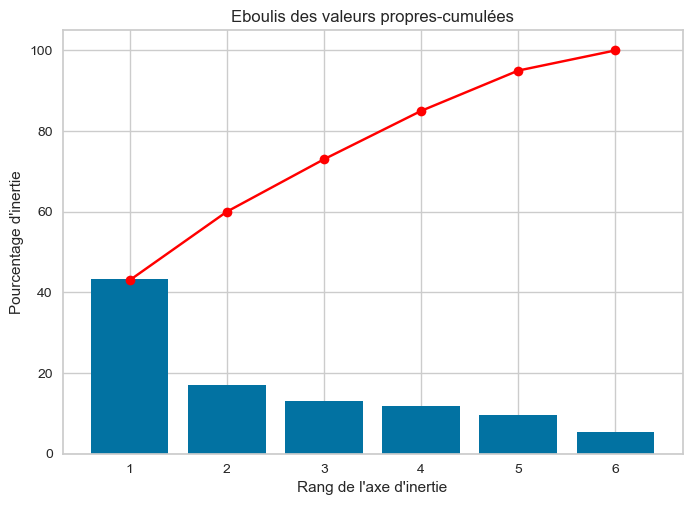

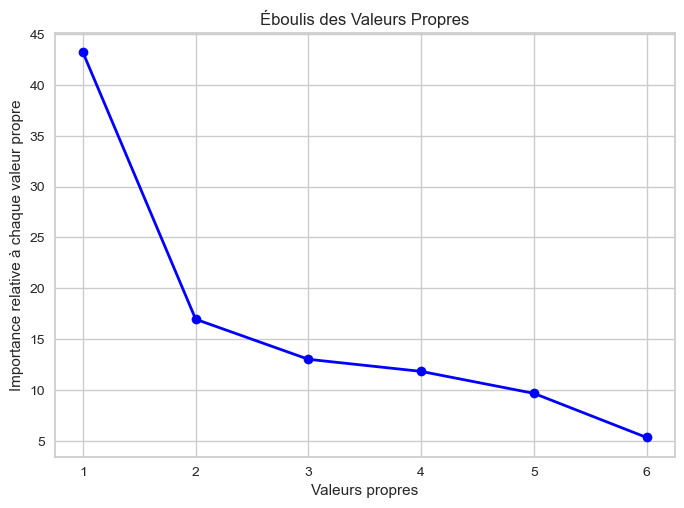

In [137]:
# Choix du nombre de composante à calculer
n_components = 6

# ACP
pca = decomposition.PCA(n_components=n_components)
pca.fit_transform(X_scaled)

# Calcul de la variance captée par chaque nouvelle composante
scree = (pca.explained_variance_ratio_*100).round(2)
# Variance expliquée cumulée
scree_cum = scree.cumsum().round()

# Création de liste des composantes 
x_list = range(1, n_components+1)


# Création du  Scree plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres-cumulées")
plt.savefig('Eboulisc1.png', dpi=300, bbox_inches='tight')
plt.show(block=False)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, scree, 'o-', linewidth=2, color='blue')
plt.title('Éboulis des Valeurs Propres')
plt.xlabel('Valeurs propres')
plt.ylabel('Importance relative à chaque valeur propre')
plt.savefig('Eboulis1.png', dpi=300, bbox_inches='tight')
plt.show()

Pour le graphique de l'éboulis des valeurs propres cumulées,en bleu on a la variance de chaque nouvelle composante et en rouge la variance cumulée.
On observe ici, que plus de 60% de la variance est compris entre les 2 premières composantes , et plus de 80% entre les 4 premières.
Toutefois le graphique de l'éboulis des valeurs propres nous montre qu'à plus de deux composantes, les informations ne sont plus très significatives.

## <font color='purple'>Analyse des composantes principales <a class="anchor" id="section_3_2"></a>

In [138]:
# Nous allons donc travailler sur les 2 premières composantes qui correspondantes à plus 60% de notre variance.
n_components = 2
pca=PCA(n_components=n_components)
# On fit les données
pca.fit(X_scaled)

PCA(n_components=2)

In [139]:
# Création de la liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2]

In [140]:
# Calcul des différentes composantes
pcs = pca.components_
pcs

array([[-0.08483969,  0.33133251,  0.39376123,  0.50658472,  0.43931716,
        -0.52758454],
       [ 0.94130571,  0.30725488,  0.10859729, -0.07316255, -0.00442827,
         0.04870577]])

In [141]:
# Création d'un dataframe
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084840,0.331333,0.393761,0.506585,0.439317,-0.527585
1,0.941306,0.307255,0.108597,-0.073163,-0.004428,0.048706


In [142]:
# Affichage avec les noms des variables correspondantes
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05


In [143]:
# Autre façon d'afficher le dataframe
pcs.T

,F1,F2
diagonal,-0.084840,0.941306
height_left,0.331333,0.307255
height_right,0.393761,0.108597
margin_low,0.506585,-0.073163
margin_up,0.439317,-0.004428
length,-0.527585,0.048706


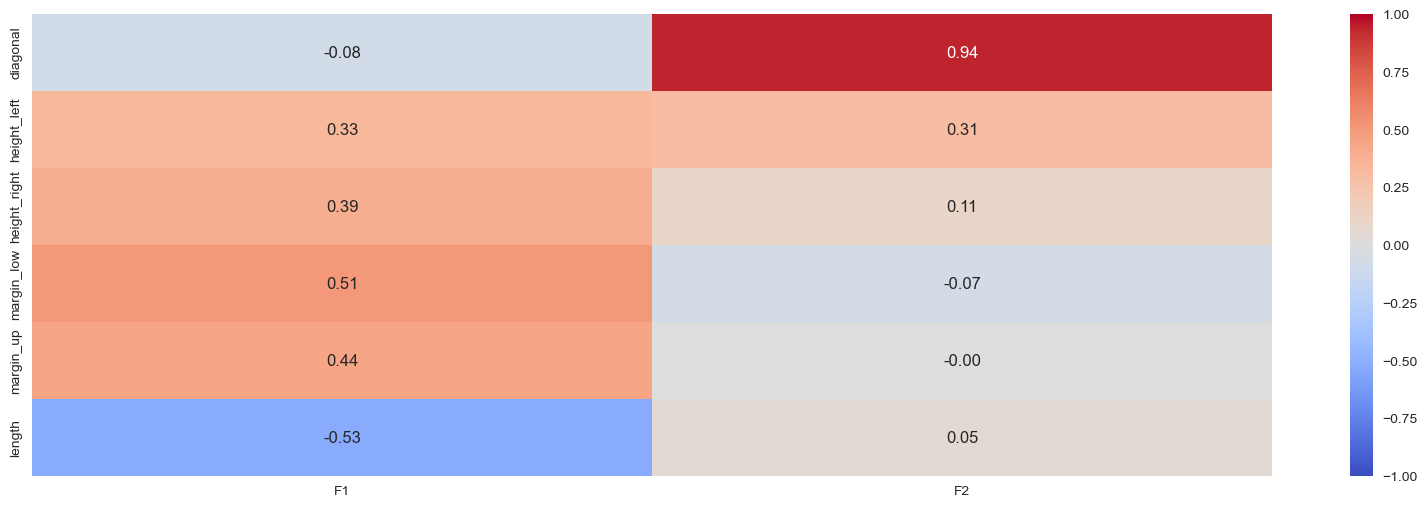

In [144]:
# Représentation graphique
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('pcsT2.png', dpi=300, bbox_inches='tight')

**Interprétation**
* Diagonal est positivement corrélé à F2.
* Height_left est positivement légèrement corrélé à F1 et F2.
* Height_right est positivement légèrement corrélé à F1.
* Margin_low est positivement corrélé à F1 .
* Margin_up est positivement corrélé à F1.
* Length est négativement corrélé à F1.


## <font color='purple'>Cercle des corrélations <a class="anchor" id="section_3_3"></a>

In [145]:
# Définition d'une fonction pour l'élaboration des cercle de corrélation.
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('corcercle.png', dpi=300, bbox_inches='tight')
    plt.show(block=False)

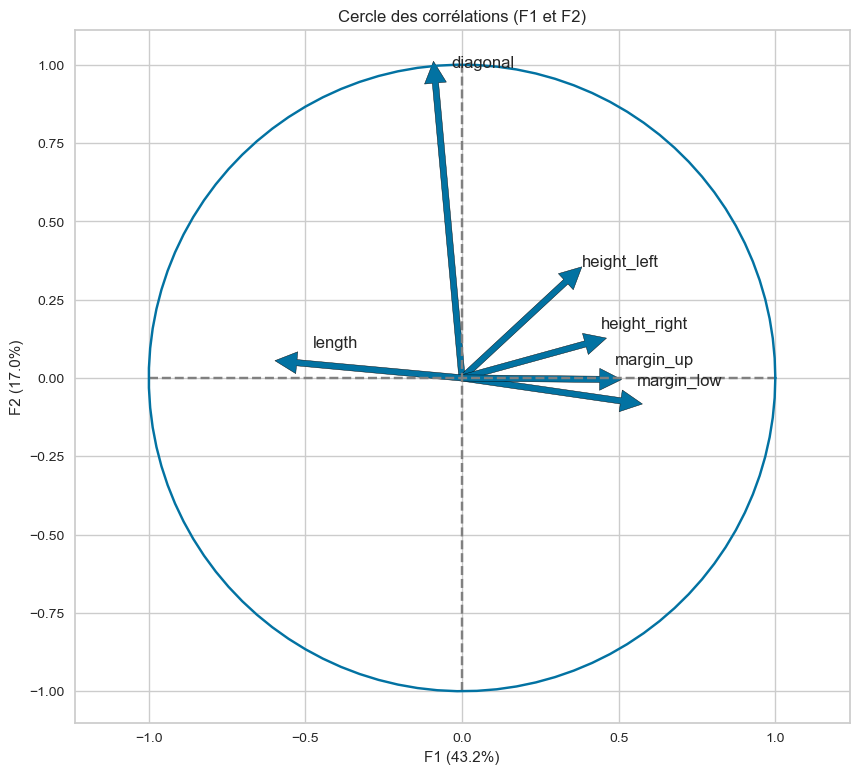

In [146]:
# Cercle de corrélation pour les deux premières composantes
x_y = (0,1)
correlation_graph(pca, x_y, features)

Nous constatons que les deux premières composantes principales, F1 et F2, captent respectivement 43.2% et 17,0% de la variance totale, ce qui signifie que le premier plan factoriel représente 60.2% de l'inertie totale.

La composante F1 nous permet de classer les billets en fonction de leur height_left et height_right(hauteurs coté gauche et droit),leur margin_up et margin_low(marges entre le bord supérieur et inférieur et l'image du billet) qui toutefois ne sont pas très bien représentée ainsi que leur length(longueur)tandis que la composante F2 est liée à la diagonale des billets.\
Nous observons aussi que le margin_low est corrélé à margin_up et anticorrelé à length.

In [147]:
# Calcul des coordonnées de nos individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.64720899,  0.74723508],
       [-2.01973701, -2.20674148],
       [-0.96899302,  2.61932122],
       [-1.37575762, -1.81765631],
       [ 0.1503854 , -0.56619059]])

## <font color='purple'>Projection des individus<a class="anchor" id="section_3_4"></a>

In [148]:
# Définition d'une fonction pour la projection des individus le plan factoriel.
def display_factorial_planes(X_projected,
                             n_components,
                             pca, 
                             axis_ranks,
                             labels=None, 
                             alpha=1,
                             illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_components:
            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

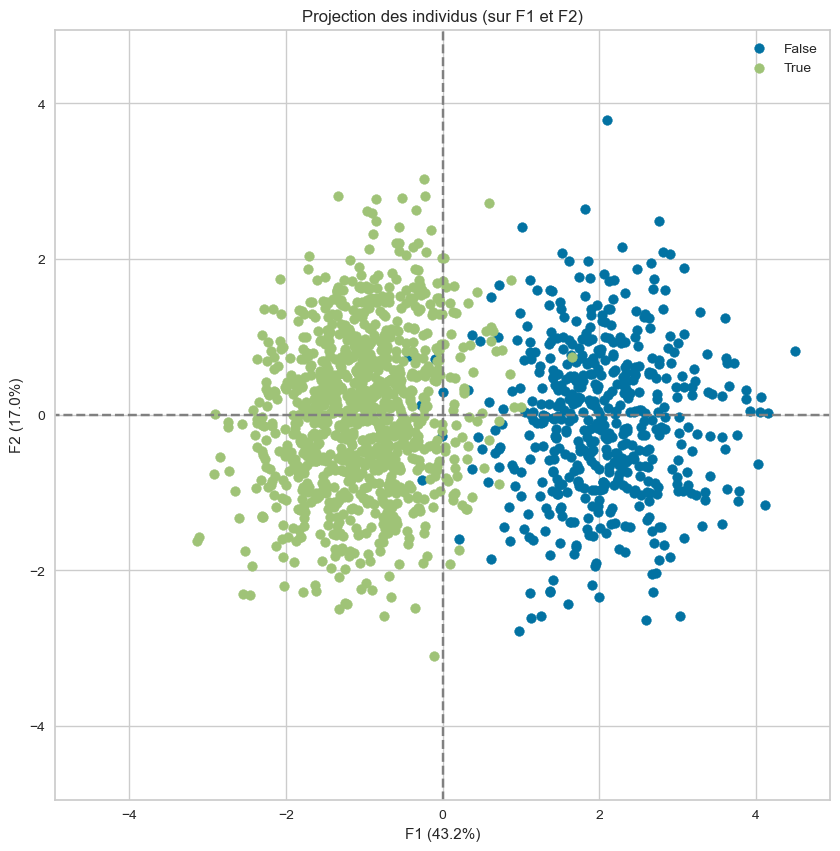

In [149]:
# Projection des individus sur le premier plan factoriel.
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_components, pca, [(0, 1)], illustrative_var = billet.index)
plt.show()

Nous constatons que les vrais billets ont une plus grande longueur(length) et diagonale(diagonal) que les faux billets tandis que les faux billets ont des plus grandes hauteurs coté gauche et droit(height_left et height_right) et des plus grandes marges entre le bord supérieur et inférieur et l'image du billet(margin_low et margin_up) que les vrais billets.

# <font color='blue'>Régression Logistique<a class="anchor" id="chapter4"></a>

In [150]:
billet = billet.reset_index()

In [151]:
# Rempacement des valeurs de la colonne 'is_genuine' par 0 pour False et 1 pour True
billet['is_genuine'].replace([False,True], [0,1], inplace=True)
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [152]:
# Sélection des variables prédictives et de la variable cible
X = billet[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]
y = billet['is_genuine']

In [153]:
# Fraction de nos données en ensemble de train et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,random_state=0)

In [154]:
# Instanciation du modèle
model_regLog = linear_model.LogisticRegression(random_state = 0,solver='liblinear')

# Entrainement du modèle
model_regLog.fit(X_train,y_train)

# Enregistrement des prédictions dans la variable y_pred
y_pred = model_regLog.predict(X_test)

# Précision du modèle
precision = model_regLog.score(X_test,y_test)
precision = round(precision*100,2)
print("La precision de notre model sur les données Test est de :", precision,"%")

La precision de notre model sur les données Test est de : 99.67 %


## <font color='purple'>Matrice de confusion<a class="anchor" id="section_4_1"></a>

In [155]:
# Matrice de confusion
confusion_matrix(y_test, y_pred)

array([[ 96,   1],
       [  0, 203]], dtype=int64)

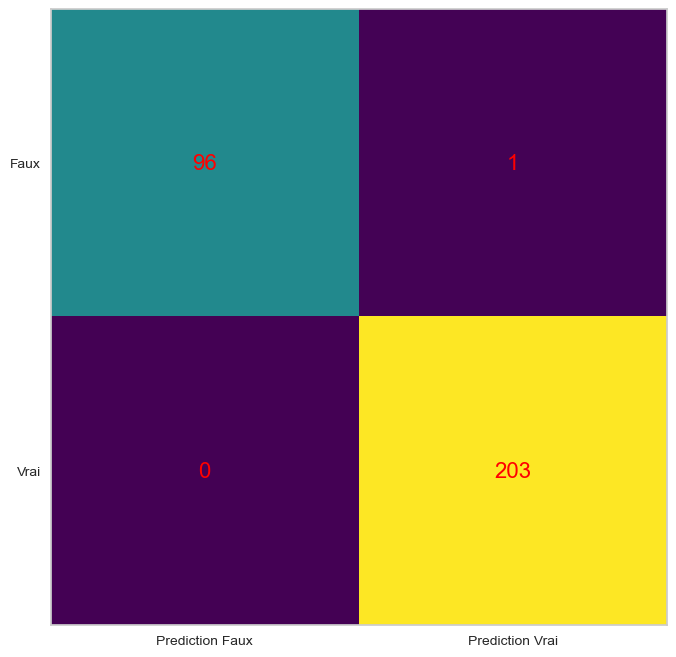

In [156]:
# Création d'un graphique pour la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap='viridis')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Prediction Faux', 'Prediction Vrai'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Faux', 'Vrai'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], fontsize=16,ha='center',va='center', color='red')
plt.show()

In [157]:
# Calcul des TN (Vrai négatif),FN (Faux négatif),TP (Vrai Positif),FP (Faux positif),
conf_matrix = confusion_matrix(y_test, y_pred)
tn_RL, fp_RL, fn_RL, tp_RL = conf_matrix.ravel()
# Affichage des résultats
print('Le modèle de regression logistique appliqué au jeu de test prédit:')
print(f"Vrais Négatifs (TN): {tn_RL}")
print(f"Faux Négatifs (FN): {fn_RL}")
print(f"Vrais Positifs (TP): {tp_RL}")
print(f"Faux Positifs (FP): {fp_RL}")

Le modèle de regression logistique appliqué au jeu de test prédit:
Vrais Négatifs (TN): 96
Faux Négatifs (FN): 0
Vrais Positifs (TP): 203
Faux Positifs (FP): 1


## <font color='purple'>Rapport de classification<a class="anchor" id="section_4_2"></a>

In [158]:
# Affichage du rapport de classification(rapport sur la qualité de prédiction)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



Les scores F1 sont tous très élevés, ce qui indique une excellente performance du modèle de régression logistique.

## <font color='purple'>Courbe de ROC <a class="anchor" id="section_4_3"></a>

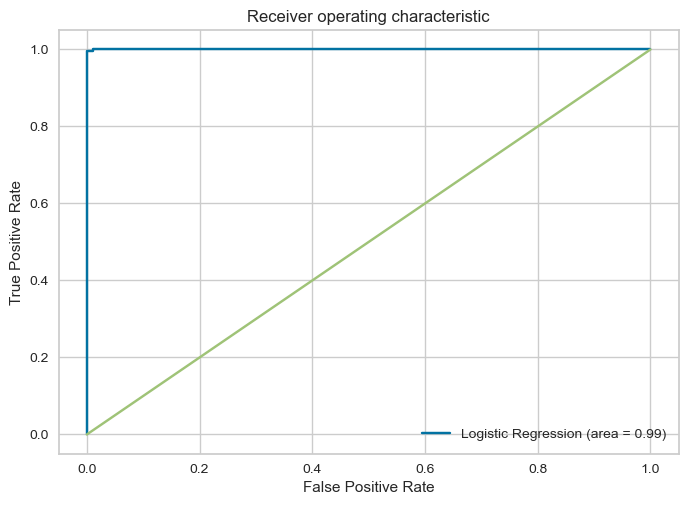

In [159]:
from sklearn.metrics import roc_auc_score
# Création d'une courbe ROC
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model_regLog.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Un AUC(mesure de la qualité de la classification)proche de 1 signifie que le modèle a une excellente capacité à distinguer entre les classes positives et négatives.
L'air de la courbe de ROC vaut 0.99 qui est très proche de 1,ce qui signifie que le modèle est très performant.

In [160]:
# Enregistrement du modèle pour pouvoir l'utiliser ailleurs
import joblib
joblib.dump(model_regLog, 'model_regLog.joblib')

['model_regLog.joblib']

# <font color='blue'>K-Means<a class="anchor" id="chapter5"></a>

In [161]:
x_train = X_train.values
x_test = X_test.values

In [162]:
# Nombre de clusters souhaités: 2 correspond à True et False
n_clust = 2 

# Clustering par K-means
model_km = KMeans(n_clusters=n_clust, random_state=0)

# Entraînement du modèle
model_km.fit(x_train)

# Prédiction des clusters pour l'ensemble de test
clusters = model_km.predict(x_test)

# Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
pca_kmeans = decomposition.PCA(n_components=6).fit(x_test)
X_projected = pca_kmeans.transform(x_test)

# Enregistrement des centroïdes pour les projeter
centroids = model_km.cluster_centers_
centroids_projected = pca_kmeans.transform(centroids)

# Prédiction à partir de notre modèle de Kmeans
y_pred_kmean = model_km.predict(x_test)

In [163]:
# Ajout de la colonne cluster dans X_test
X_test["cluster_test"] = clusters
X_test

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_test
471,172.58,104.17,103.13,4.640000,3.17,113.05,0
9,172.47,104.07,104.02,4.040000,3.25,113.45,0
1499,171.47,104.15,103.82,4.630000,3.37,112.07,1
54,172.02,103.58,103.80,3.950000,3.46,112.40,0
1411,171.95,104.39,104.31,5.980000,3.23,111.33,1
...,...,...,...,...,...,...,...
220,171.26,103.59,103.80,4.110000,3.25,113.03,0
946,171.63,103.87,104.66,4.070009,3.27,112.68,0
992,171.79,103.69,103.68,3.650000,2.77,112.78,0
1496,172.19,104.63,104.44,5.270000,3.37,110.97,1


In [164]:
# Récupération des clusters attribués à chaque individu dans x_train et ajout dans l'ensemble X_train
clusters_train = model_km.labels_
X_train["cluster_train"] = clusters_train
X_train

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_train
620,171.87,103.40,103.82,4.06,2.94,113.02,0
655,172.09,104.06,103.90,3.97,3.32,113.09,0
319,172.05,104.11,104.14,4.73,2.73,113.30,0
140,172.47,103.82,103.59,3.85,2.77,113.17,0
629,172.01,104.03,103.67,3.90,3.18,112.61,0
...,...,...,...,...,...,...,...
763,172.41,104.43,103.65,3.97,3.35,113.71,0
835,172.15,104.08,104.10,4.34,2.78,113.33,0
1216,171.93,104.09,104.51,4.87,3.58,111.63,1
559,172.12,103.59,103.77,3.74,3.21,113.32,0


In [165]:
# Analyse des caractéristiques moyens de chaque cluster dans X_test
clusterkms_average = X_test.groupby('cluster_test').mean()
clusterkms_average

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster_test,,,,,,
0,172.010583,103.958641,103.824223,4.123687,3.062913,113.210777
1,171.933085,104.179468,104.138936,5.206064,3.360000,111.580319


In [166]:
# Analyse des caractéristiques moyens de chaque cluster dans le X_train
clusterkms_averages = X_train.groupby('cluster_train').mean()
clusterkms_averages

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster_train,,,,,,
0,171.980814,103.950111,103.810875,4.122460,3.056979,113.191406
1,171.890308,104.196427,104.146504,5.249691,3.344987,111.592674


**Interprétation**\
Nous constatatons que pour l'ensemble de train et l'ensemble de test:
* Le cluster 0 rassemble les billets caractérisés par une diagonale plus longue,des height_left et height_right plus basses(hauteurs mesurées sur le côté droit et sur le côté gauche) ,les plus petites margin_low et margin_up(marges entre le bord inférieur et supérieur du billet et son image)  ainsi q'une plus grande length(longueur).
* Le cluster 1, en revanche, regroupe les billets présentant une diagonale plus courte, des height plus élevées, des margin_low et margin_up plus importantes et une length(longueur) plus réduite. 

## <font color='purple'>Projection des individus et centroïdes sur le premier plan factoriel<a class="anchor" id="section_5_1"></a>

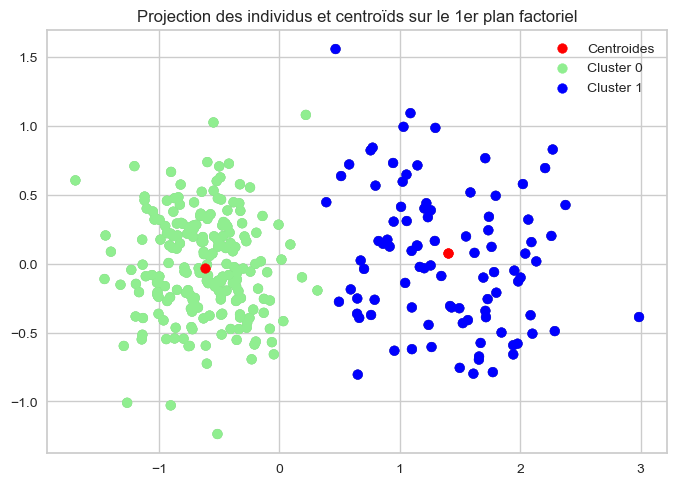

In [167]:
# Affichage du clustering par projection des individus et centroïds sur le premier plan factoriel pour l'ensemble de test

# Affichage des clusters
scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap='Accent')

# Affichage des centroids
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], color='red',label='Centroides')

# Couleurs pour chaque cluster
colors = ['lightgreen' if label == 0 else 'blue' for label in clusters]

# Affichage des clusters avec les couleurs spécifiées
plt.scatter(X_projected[:, 0], X_projected[:, 1], color=colors)

# Affichage des centroids
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], color='red')

# Création des points de légende pour chaque cluster avec les couleurs spécifiées
plt.scatter([], [], color='lightgreen', label='Cluster 0')
plt.scatter([], [], color='blue', label='Cluster 1')

# Titre du graphique
plt.title("Projection des individus et centroïds sur le 1er plan factoriel")

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.show()

La visualisation des données sur le premier plan factoriel révèle que le cluster 0 est constitué de vrais billets, alors que le cluster 1 regroupe des faux billets.

## <font color='purple'>Matrice de confusion<a class="anchor" id="section_5_2"></a>

In [168]:
# Associer chaque cluster à l'étiquette la plus fréquente dans le cluster
labels = np.zeros_like(clusters)
for i in range(n_clust):
    mask = (clusters == i)
    labels[mask] = mode(y_test[mask])[0]

# Affichage de la matrice de confusion avec les étiquettes réelles et celles attribuées
print("Matrice de confusion", confusion_matrix(y_test, labels))

Matrice de confusion [[ 94   3]
 [  0 203]]


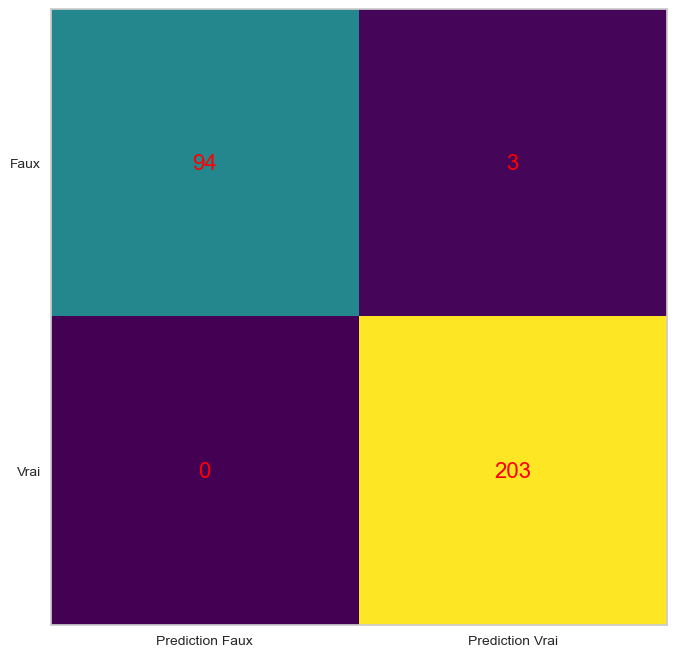

In [169]:
# Création d'un graphique de la matrice de confusion
cm = confusion_matrix(y_test,labels)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap='viridis')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Prediction Faux', 'Prediction Vrai'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Faux', 'Vrai'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], fontsize=16,ha='center',va='center', color='red')
plt.show()

In [170]:
# Calcul des TN (Vrai négatif),FN (Faux négatif),TP (Vrai Positif),FP (Faux positif),
conf_matrixkm = confusion_matrix(y_test, labels)
tn_RL, fp_RL, fn_RL, tp_RL = conf_matrixkm.ravel()
# Affichage des résultats
print('Le modèle deK-Means appliqué au jeu de test prédit:')
print(f"Vrais Négatifs (TN): {tn_RL}")
print(f"Faux Négatifs (FN): {fn_RL}")
print(f"Vrais Positifs (TP): {tp_RL}")
print(f"Faux Positifs (FP): {fp_RL}")


Le modèle deK-Means appliqué au jeu de test prédit:
Vrais Négatifs (TN): 94
Faux Négatifs (FN): 0
Vrais Positifs (TP): 203
Faux Positifs (FP): 3


## <font color='purple'>Rapport de classification<a class="anchor" id="section_5_3"></a>

In [171]:
# Affichage du rapport de classification(rapport sur la qualité de prédiction)
print(classification_report(y_test,labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        97
           1       0.99      1.00      0.99       203

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



Les scores F1 sont tous très élevés, ce qui indique une excellente performance du modèle de K-Means.

## <font color='purple'>Choix du modèle de prédiction<a class="anchor" id="section_5_4"></a>

In [172]:
# On vérifie le score de notre modèle sur les données Test (F1 score)
score_f1 = f1_score(y_test, y_pred)
score_f1 = round(score_f1*100,2)
print("Le score du modèle de régression logistique sur les données Test est de :", score_f1,"%")

Le score du modèle de régression logistique sur les données Test est de : 99.75 %


In [173]:
# On vérifie le score de notre modèle sur les données Test (F1 score)
score_f1 = f1_score(y_test,labels)
score_f1 = round(score_f1*100,2)
print("Le score du modèle de K-means sur les données Test est de :", score_f1,"%")

Le score du modèle de K-means sur les données Test est de : 99.27 %


Bien que les deux modèles montrent des performances élevées, la régression logistique est le choix le plus approprié pour la classification des billets en vrais ou faux, en raison de sa nature supervisée, et de sa  meilleure performance en termes de score F1.

# <font color='blue'>Construction de l'algorithme de prédiction de la régression logistique<a class="anchor" id="chapter6"></a>

In [174]:
# Définition d'une fonction de prédiction
def prediction_billet_RegLog(data):
    data = data.set_index(data["id"])
    data.drop(["id"], axis=1, inplace=True)
    
    # On charge le modèle de régression logistique
    model_regLog = joblib.load('modele_RL.joblib')
    
    # On réalise la prédiction avec le modèle pré-entrainé
    prediction = model_regLog.predict(data)
    
    # Calcul des probabilités d'appartenance à chaque classe pour chaque observation
    proba = model_regLog.predict_proba(data)
    
    # Ajout des prédictions calculées par le modèle au dataframe
    data["Prédiction"] = prediction
    
    # Probalilité que le billet soit VRAI (is_genuine = 1)
    score_new = proba[:,1]

    # Ajout des probabilités calculées par le modèle au dataframe
    data["Probabilité"] = score_new
    data["Probabilité"] = round((data["Probabilité"]*100),2)
    
    # Création de la colonne is_genuine qui indique True si la probabilité que le billet soit vrai('is_genuine=1') est supérieure ou égale à 50%
    data["is_genuine"] = np.where(data["Probabilité"]>=50, 'True', 'False')
    
    display(data)

In [175]:
# Test de l'algorithme sur le dataframe billets_production
# Importation du fichier billets_production
billets_production = pd.read_csv('billets_production (3).csv')

In [176]:
# Observation du daraframe billets_production
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [177]:
# Prédiction des classe de billet du dataframe billets_production
prediction_billet_RegLog(billets_production)

,diagonal,height_left,height_right,margin_low,margin_up,length,Prédiction,Probabilité,is_genuine
id,,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,0,0.63,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,0,0.11,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,0,0.14,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,1,90.68,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,1,99.95,True
